### Bibliotecas

In [1]:
import sys
!{sys.executable} -m pip install pingouin scipy

In [2]:
import pingouin as pg
import pandas as pd
from scipy.stats import spearmanr 

## Limpeza e tratamento dos dados

#### Captura de dados faltantes

In [3]:
df = pd.read_csv(f'summaries_global_evaluation.csv')

In [4]:
df.head(10)

,class_label,text,summary_1,summary_2,alex_openai rating,alex_llama rating,damires_openai rating,damires_llama rating,luana_openai rating,luana_llama rating,ragas_openai_rating,ragas_llama_rating
0,NaN,Vou tentar resumir a história:Eu estava me sen...,"Ontem, fui ao barbeiro para aparar a barba, qu...",Eu estava me sentindo bem comigo mesmo até ont...,"0,94","0,99","0,9","0,70","0,7","0,50","0,597808604744678","0,610876558102136"
1,NaN,Não sei se esse é o lugar ideal pra postar iss...,Estou me sentindo desesperado e confuso sobre ...,Estou desesperado e confuso. Sempre soube que ...,"0,99","0,99","0,9","0,70","0,5","0,60","0,466844286560106","0,588566350710910"
2,NaN,"Mini-desabafo, desculpem.Recentemente tenho me...","Recentemente, tenho me sentido completamente s...",Estou me sentindo completamente isolado e desc...,"0,98",1,"0,7","0,90","0,65","0,80","0,461238223418632","0,421130551817009"
3,NaN,"faço 25 daqui 3 meses e nem saio de casa, moro...","Daqui a três meses, faço 25 anos e mal saio de...",Estou prestes a completar 25 anos e sinto que ...,"0,98",1,1,"0,50","0,75","0,60","0,542845911949726","0,552148846960201"
4,NaN,"Olha, eu nn tenho me sentido legal pelo fato s...","Ultimamente, não tenho me sentido bem por ter ...",Eu não me sinto bem comigo mesma porque precis...,"0,99",1,"0,6","0,90","0,8","0,70","0,580194410692639","0,681265206812690"
5,NaN,Eu sempre me senti muito feio e com habilidade...,Sempre me senti muito feio e com habilidades s...,Eu sempre me senti feio e com habilidades soci...,1,"0,5",1,"0,00","0,8","0,40","0,483922383922391","0,433166943982258"
6,NaN,Sempre fui uma pessoa ansiosa e com dificuldad...,Sempre fui uma pessoa ansiosa e com dificuldad...,Eu sempre fui uma pessoa ansiosa e com dificul...,"0,98","0,97",1,"0,50","0,9","0,90","0,667435601691658","0,483852364475203"
7,NaN,"Então, sou um homem de 40 anos. Tenho uma espo...","Sou um homem de 40 anos, casado e pai de dois ...","Eu sou um homem de 40 anos, casado e pai de do...","0,92","0,9",NaN,"0,30",1,"0,90","0,771425772503360","0,740073145245560"
8,NaN,"Sempre tive uma mentalidade forte, conseguindo...",Sempre tive uma mentalidade forte e acreditei ...,"Eu sempre fui uma pessoa forte e otimista, cap...","0,98",1,"0,8","0,70","0,9","0,80","0,432120993878287","0,529227444624528"
9,NaN,"Bom pessoal, sou homem, tenho 23 anos, atualme...","Sou um homem de 23 anos, estudante em uma cida...","Eu sou um homem de 23 anos, estudante de facul...",1,1,"0,8","0,70","0,85","0,90","0,505242463958065","0,444007572447943"


In [5]:
# padronizar as colunas
df.columns = df.columns.str.replace(' ', '_')

df.columns

Index(['class_label', 'text', 'summary_1', 'summary_2', 'alex_openai_rating',
       'alex_llama_rating', 'damires_openai_rating', 'damires_llama_rating',
       'luana_openai_rating', 'luana_llama_rating', 'ragas_openai_rating',
       'ragas_llama_rating'],
      dtype='object')

In [6]:
rating_cols = [col for col in df.columns if col.endswith('rating')]

for col in rating_cols:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

In [7]:
df.isnull().sum()

class_label              12
text                      0
summary_1                 0
summary_2                 0
alex_openai_rating        0
alex_llama_rating         0
damires_openai_rating     1
damires_llama_rating      0
luana_openai_rating       0
luana_llama_rating        0
ragas_openai_rating       0
ragas_llama_rating        0
dtype: int64

#### Remoção da observação

In [8]:
df_without_class_label = df.drop(columns='class_label')
df_without_na = df_without_class_label.dropna()

In [9]:
df_without_na.isnull().sum()

text                     0
summary_1                0
summary_2                0
alex_openai_rating       0
alex_llama_rating        0
damires_openai_rating    0
damires_llama_rating     0
luana_openai_rating      0
luana_llama_rating       0
ragas_openai_rating      0
ragas_llama_rating       0
dtype: int64

### Divisão dos datasets por resumo

In [ ]:
SOURCE_CSV   = "data/summaries_evaluation.csv"      
OUT_OPENAI   = "outputs/summaries_openai.csv"
OUT_LLAMA    = "outputs/summaries_llama.csv"

BASE_COL     = "text"                    
OPENAI_COLS  = [
    "summary_openai",
    "h1_openai_rating",
    "h2_openai_rating",
    "h3_openai_rating",
    "ragas_openai_rating",
]
LLAMA_COLS   = [
    "summary_llama",
    "h1_llama_rating",
    "h2_llama_rating",
    "h3_llama_rating",
    "ragas_llama_rating",
]


In [11]:
df_openai = df_without_na[[BASE_COL] + OPENAI_COLS].copy()
df_llama  = df_without_na[[BASE_COL] + LLAMA_COLS].copy()

KeyError: "['summary_openai', 'h1_openai_rating', 'h2_openai_rating', 'h3_openai_rating'] not in index"

In [ ]:
df_openai.to_csv(OUT_OPENAI, index=False)
df_llama.to_csv(OUT_LLAMA,  index=False)

## Cálculo da pontuação para cada resumo

### Cálculo da confiabilidade entre avaliadores humanos

#### Coeficiente de correlação intraclasse (ICC)

Definição:

O ICC (3,k) mede a consistência média das avaliações quando k avaliadores fixos atribuem notas ao mesmo conjunto de itens. É um modelo de efeitos mistos (dois fatores).

Justificativa técnica:

- Avaliar a confiabilidade é necessário antes de qualquer agregação; sem concordância mínima, a média das notas pode ser enganosa.
- O modelo 3,k é indicado quando todos os avaliadores julgam todos os itens e interessam apenas esses avaliadores específicos.

Referências:

`Koo TK, Li MY (2016) A guideline of selecting and reporting intraclass correlation coefficients for reliability research. Journal of Chiropractic Medicine 15(2). DOI: 10.1016/j.jcm.2016.02.012`

https://pmc.ncbi.nlm.nih.gov/articles/PMC4913118/

In [ ]:
RATING_OPENAI = ['h1_openai_rating', 'h2_openai_rating', 'h3_openai_rating']
RATING_LLAMA  = ['h1_llama_rating' , 'h2_llama_rating', 'h3_llama_rating']

In [ ]:
def icc3k_from_frame(df_subset, rating_cols, id_col='index'):
    df_long = (df_subset
               .reset_index()  
               .melt(id_vars=id_col, value_vars=rating_cols,
                     var_name='rater', value_name='rating'))
    tbl = pg.intraclass_corr(
        data=df_long,
        targets=id_col,
        raters='rater',
        ratings='rating'
    )
    return tbl.loc[tbl['Type']=='ICC3k','ICC'].iat[0]

In [ ]:
# ---- ICC for OpenAI summaries ----
icc_openai = icc3k_from_frame(df_openai[RATING_OPENAI], RATING_OPENAI)
print(f'ICC(3,k)  –  OpenAI: {icc_openai:.3f}')

# ---- ICC for LLaMA summaries ----
icc_llama  = icc3k_from_frame(df_llama[RATING_LLAMA], RATING_LLAMA)
print(f'ICC(3,k)  –  LLaMA : {icc_llama:.3f}')

#### Conclusão

- OpenAI:

Valores negativos (ou muito próximos de 0) indicam que a variância entre avaliadores é maior que a variância entre resumos ⇒ praticamente não há consenso – e, pior, alguma nota de um avaliador anda na direção oposta à de outro.

Segundo Koo & Li (2016), qualquer ICC < 0,50 já é “pobre”; negativo indica desconformidade sistemática ou problemas de dados (transposição de colunas, escalas invertidas, etc.).

- LLaMA:

Isso cai na faixa “moderada” (0,50 – 0,75) segundo Koo & Li (2016). Quando a consistência é moderada, tratamos os avaliadores como úteis, mas não totalmente intercambiáveis. O próximo passo é gerar uma nota humana robusta (H_bar) que reduza a influência de quem estiver menos alinhado aos pares.

### Solução para confiabilidade moderada (LLaMA)

#### Pesar cada avaliador pela sua correlação com os demais

##### Correlação de Postos de Spearman (ρ)

Definição:

Coeficiente não paramétrico que mede a força e o sentido de uma relação monotônica entre duas variáveis. Em vez de usar os valores brutos, converte-os em posições (ranks); assim, ρ varia de –1 (associação monotônica negativa perfeita) a +1 (positiva perfeita), sem exigir que a relação seja linear ou que os dados sigam distribuição normal.

Justificativa técnica:

- Ao trabalhar apenas com as ordens dos dados, o ρ dispensa suposições de normalidade, é menos sensível a outliers e mantém controle adequado do erro tipo mesmo em amostras pequenas. 
- Avaliações recentes de modelos de linguagem mostram que ρ é a métrica de correlação preferida para ligar métricas automáticas a julgamentos humanos, por capturar coerentemente diferenças de ranking mesmo quando a relação não é estritamente linear.

Referências:

`Schaeffer R, Koura PS, Tang B, et al. (2024) Correlating and Predicting Human Evaluations of Language Models from NLP Benchmarks. ICLR 2025 Proceedings (in press). ` URL: https://openreview.net/forum?id=52Idqv2FNY

In [ ]:
import numpy as np
weights = []

for col in RATING_LLAMA:
    others = df_llama[[c for c in RATING_LLAMA if c != col]].mean(axis=1)
    r, _   = spearmanr(df_llama[col], others)
    weights.append(max(r, 0))
w = np.array(weights)
print(dict(zip(RATING_LLAMA, w.round(3))))

dá mais voz a quem costuma concordar com a “média do grupo”; quem diverge muito recebe peso menor (ou zero, se r ≤ 0).

##### Média ponderada das avaliações humanas

Definição:

Índice obtido por 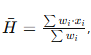, onde Xi é a nota do avaliador e Wi o peso de confiabilidade.

Justificativa técnica:

- A média ponderada minimiza o erro quadrático quando os pesos refletem precisão, sendo prática consagrada em construção de indicadores compostos. 
- Ao usar apenas correlações positivas, preserva-se a interpretação como “consenso confiável” sem penalizar excessivamente avaliadores discordantes.

Referências:

`Ocean N (2023) Weighting ratings: are people adjusting for bias in extreme reviews? Journal of Consumer Research. ` URL: https://wrap.warwick.ac.uk/177481

In [ ]:
df_llama['H_bar'] = (df_llama[RATING_LLAMA] * w).sum(axis=1) / w.sum()

In [ ]:
df_llama.head(10)

#### Calcular a correlação com a métrica automática (RAGAS)

In [ ]:
rho, p = spearmanr(df_llama['H_bar'], df_llama['ragas_llama_rating'])
print(f"Spearman ρ = {rho:.3f}  (p = {p:.4f})")

#### Definir o peso da métrica automática

Definição:

Para cada avaliador i, estima-se `wᵢ = max(ρᵢ, 0)`, onde ρᵢ é a correlação de Spearman entre as notas desse avaliador e a média dos demais, zerando correlações negativas.

Justificativa técnica:

- Correlacionar cada avaliador ao consenso é um proxy simples de acurácia; atribuir peso proporcional reduz a influência de avaliadores inconsistentes. 
- Métodos de agregação ponderada baseados na acurácia do “ranker” mostraram melhora na estabilidade de rankings e na redução de viés.

Referências:

Ocean N (2023) Weighting ratings: are people adjusting for bias in extreme reviews? Journal of Consumer Research. URL: https://wrap.warwick.ac.uk/177481


In [ ]:
w_A = min(max(rho, 0), 0.30)
w_A

Como a referência humana é moderadamente confiável, limitar w_A a, digamos, ≤ 0,30 continua uma boa prática 

#### Score Composto (H + RAGAS)



Combina a avaliação humana (H) com a métrica automática RAGAS, limitando a influência da métrica a 30 %.

Justificativa técnica:

- Combina o baixo custo e a reprodutibilidade das métricas automáticas ao rigor qualitativo de avaliações humanas, uma tendência em avaliações de LLMs para reduzir vieses de cada fonte isoladamente. 
- Abordagens “LLM-as-Judge” recentes demonstram que ponderações calibradas alcançam correlação com humanos comparável ao próprio acordo interavaliador, validando a adoção de pesos modestos.

Referências:

`Zhou X et al. (2025) An LLM-as-Judge metric for bridging the gap with human evaluation in software-engineering tasks. arXiv:2505.20854`

In [ ]:
df_llama['Score'] = (df_llama['H_bar'] + w_A*df_llama['ragas_llama_rating']) / (1 + w_A)

In [ ]:
df_llama.head(10)

In [ ]:
df_llama.to_csv(f'llama_results.csv')

### Solução para avaliadores muito díspares (OpenAI)

#### H₍rob₎ – Mediana Robusta das Avaliações

Definição:
Mediana das notas humanas, escolhida por seu ponto de ruptura de 50 %, o que a torna resistente a outliers e notas aberrantes.

Justificativa técnica:

- A mediana mantém-se estável mesmo com até metade de observações contaminadas, recomendada quando há suspeita de avaliadores extremos. 
- A mediana é o “fallback” quando ICC<0.4

Referências:
https://pmc.ncbi.nlm.nih.gov/articles/PMC7875178/
https://pareto.ai/blog/inter-rater-reliability

In [ ]:
df_openai['H_rob'] = df_openai[RATING_OPENAI].median(axis=1)

In [ ]:
df_openai['H_rob']

#### Calcula a correlação com o Ragas

In [ ]:
rho, p = spearmanr(df_openai['H_rob'], df_openai['ragas_openai_rating'])
print(f"ρ={rho:.3f}, p={p:.4f}")

In [ ]:
    # 0,3 (teto prático recomendado quando a referência humana é ruidosa).
w_A = min(max(rho, 0), 0.30)

#### Pontuação composta por resumo

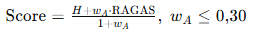

Combina a avaliação humana (H) com a métrica automática RAGAS, limitando a influência da métrica a 30 %.

Justificativa técnica:

- Combina o baixo custo e a reprodutibilidade das métricas automáticas ao rigor qualitativo de avaliações humanas, uma tendência em avaliações de LLMs para reduzir vieses de cada fonte isoladamente. 
- Abordagens “LLM-as-Judge” recentes demonstram que ponderações calibradas alcançam correlação com humanos comparável ao próprio acordo interavaliador, validando a adoção de pesos modestos.

Referências:

`Zhou X et al. (2025) An LLM-as-Judge metric for bridging the gap with human evaluation in software-engineering tasks. ` URL: https://arxiv.org/abs/2505.20854

In [ ]:
df_openai['Score'] = (df_openai['H_rob'] + w_A * df_openai['ragas_openai_rating']) / (1 + w_A)


In [ ]:
df_openai.head(10)

In [ ]:
df_openai.to_csv(f'openai_results.csv')

## Visualização dos scores

In [ ]:
df_scores = pd.concat(
    [
        df_llama['Score'].rename('score_llama'),
        df_openai['Score'].rename('score_openai')
    ],
    axis=1
)

In [ ]:
df_scores['veredito'] = np.where(
    df_scores['score_llama'] >= df_scores['score_openai'],
    'llama',
    'openai'
)

In [ ]:
display(df_scores)